In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.ensemble import RandomForestClassifier
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from sklearn.model_selection import train_test_split, GridSearchCV
#import xgboost as xgb 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#from xgboost import XGBClassifier
#from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LinearRegression
from twilio.rest import Client
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics.pairwise import cosine_similarity
% matplotlib inline

Using TensorFlow backend.


In [2]:
def send_text(msg):
    number = '2055836550'
    account = 'ACb79e8f092d848ec4dcfffaf1a1b85b42'
    token = '5c36135e2c888fd9056780f467bc33b9'
    
    client = Client(account, token)

    message = client.messages.create(to="+12512231386", from_="+12055836550",
                                 body=msg)

In [3]:
def get_class_weights():
    class_weights = list(class_weight.compute_class_weight('balanced', np.unique(y_train), y_train))

    w_array = np.ones(y_train.shape[0], dtype = 'float')

    for i,j in enumerate(y_train):
        w_array[i] = class_weights[j-1]
    
    return w_array

In [4]:
le = LabelEncoder()

In [159]:
#data = pd.read_csv('movies_ohe_V4.csv')
t_df = data.copy()
df.tail()

,Gender,Age,Occupation,Rating,Hour,Drama,Animation,Children's,Musical,Romance,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Year_Difference,Year_Made,Day_of_Week
196237,0,3,17,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1997,1
276601,0,3,7,3,14,0,0,0,0,0,...,0,1,0,0,1,0,0,10,1990,1
294190,1,3,4,3,23,0,0,1,1,0,...,0,0,0,0,0,0,0,7,1993,2
914104,0,3,1,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,4,1996,6
476830,1,3,11,4,19,0,0,0,0,0,...,0,0,0,0,0,0,0,14,1986,2


In [6]:
len(df)

1000209

In [7]:
df = df.sample(100000)

In [8]:
to_drop = ['Zip-code', 'Timestamp', 'Title', 'Year_Reviewed', 'Day', 'UserID', 'MovieID']#, 'Hour']#, 'UserID']
df.drop(to_drop, axis = 1, inplace = True)
df.Day_of_Week = le.fit_transform(df.Day_of_Week)
df.Occupation = le.fit_transform(df.Occupation)
df.Gender = [1 if i == 'F' else 0 for i in df.Gender]

In [9]:
features = df.drop('Rating', axis = 1)
labels = df.Rating

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [11]:
X_train.head()

,Gender,Age,Occupation,Hour,Drama,Animation,Children's,Musical,Romance,Comedy,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Year_Difference,Year_Made,Day_of_Week
823373,0,3,2,19,0,0,0,0,0,0,...,1,0,0,0,0,0,0,11,1989,6
659322,0,2,4,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2000,4
30865,0,2,16,21,1,0,1,0,0,0,...,0,0,0,0,0,0,0,18,1982,0
637138,1,5,17,19,1,0,0,0,1,0,...,1,1,0,0,0,0,0,8,1994,0
949872,1,3,2,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,1990,0


In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/Users/ericcriteser/anaconda2/envs/deeplearning/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [50]:
model = Sequential()
model.add(Dense(128, input_dim=25, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
hist = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split = .2, verbose = 2)

Train on 56000 samples, validate on 14000 samples
Epoch 1/150
 - 4s - loss: 1.3429 - acc: 0.3979 - val_loss: 1.4094 - val_acc: 0.3631
Epoch 2/150
 - 4s - loss: 1.3411 - acc: 0.3981 - val_loss: 1.4119 - val_acc: 0.3620
Epoch 3/150
 - 4s - loss: 1.3397 - acc: 0.3987 - val_loss: 1.4169 - val_acc: 0.3583
Epoch 4/150
 - 4s - loss: 1.3381 - acc: 0.3996 - val_loss: 1.4160 - val_acc: 0.3614
Epoch 5/150
 - 4s - loss: 1.3355 - acc: 0.3999 - val_loss: 1.4185 - val_acc: 0.3594
Epoch 6/150
 - 4s - loss: 1.3330 - acc: 0.4028 - val_loss: 1.4222 - val_acc: 0.3594
Epoch 7/150
 - 4s - loss: 1.3303 - acc: 0.4054 - val_loss: 1.4213 - val_acc: 0.3559
Epoch 8/150
 - 4s - loss: 1.3279 - acc: 0.4078 - val_loss: 1.4226 - val_acc: 0.3594
Epoch 9/150
 - 4s - loss: 1.3255 - acc: 0.4082 - val_loss: 1.4267 - val_acc: 0.3569
Epoch 10/150
 - 5s - loss: 1.3229 - acc: 0.4093 - val_loss: 1.4314 - val_acc: 0.3574
Epoch 11/150
 - 4s - loss: 1.3210 - acc: 0.4094 - val_loss: 1.4304 - val_acc: 0.3564
Epoch 12/150
 - 4s - los

Epoch 97/150
 - 5s - loss: 1.2038 - acc: 0.4722 - val_loss: 1.6346 - val_acc: 0.3379
Epoch 98/150
 - 5s - loss: 1.2027 - acc: 0.4733 - val_loss: 1.6337 - val_acc: 0.3359
Epoch 99/150
 - 4s - loss: 1.2014 - acc: 0.4736 - val_loss: 1.6330 - val_acc: 0.3365
Epoch 100/150
 - 4s - loss: 1.2008 - acc: 0.4741 - val_loss: 1.6369 - val_acc: 0.3395
Epoch 101/150
 - 4s - loss: 1.2003 - acc: 0.4741 - val_loss: 1.6341 - val_acc: 0.3377
Epoch 102/150
 - 4s - loss: 1.1997 - acc: 0.4749 - val_loss: 1.6452 - val_acc: 0.3322
Epoch 103/150
 - 4s - loss: 1.1975 - acc: 0.4750 - val_loss: 1.6436 - val_acc: 0.3382
Epoch 104/150
 - 5s - loss: 1.1983 - acc: 0.4743 - val_loss: 1.6461 - val_acc: 0.3346
Epoch 105/150
 - 4s - loss: 1.1970 - acc: 0.4755 - val_loss: 1.6540 - val_acc: 0.3374
Epoch 106/150
 - 4s - loss: 1.1963 - acc: 0.4767 - val_loss: 1.6471 - val_acc: 0.3354
Epoch 107/150
 - 4s - loss: 1.1958 - acc: 0.4773 - val_loss: 1.6481 - val_acc: 0.3355
Epoch 108/150
 - 4s - loss: 1.1948 - acc: 0.4760 - val_lo

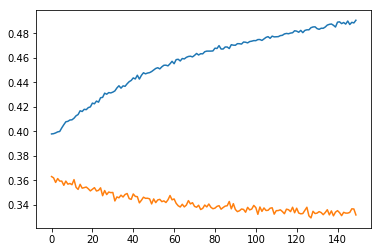

In [58]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

In [27]:
w_array = get_class_weights()

In [122]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [403]:
#df.info()

In [412]:
X_test.head()

,UserID,Gender,Age,Occupation,MovieID,Hour,Day,Year_Reviewed,Drama,Animation,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Year_Difference,Year_Made,Day_of_Week
895536,5755,1,4,2,184,23,Saturday,2000,1,0,...,0,0,0,0,0,0,0,6,1994,2
899739,4585,0,4,7,519,22,Saturday,2000,0,0,...,1,0,0,0,0,0,0,7,1993,2
55687,1503,0,3,12,3114,17,Monday,2000,0,1,...,0,0,0,0,0,0,0,1,1999,1
63727,2166,0,1,10,648,0,Sunday,2000,0,0,...,0,0,1,0,0,0,0,4,1996,3
822011,3201,0,5,7,2178,17,Sunday,2000,0,0,...,1,0,0,0,0,0,0,28,1972,3


In [28]:
#model = XGBClassifier(colsample_bytree = .5, eta = 0.4, learning_rate = 0.01,# max_depth = 60,
                       # min_child_samples = 20, min_child_weight = 0.001, n_estimators =100, num_class = 5,
                        #objective = 'multi:softmax', silent = 1, class_weights = {1:.1,2:.1,3:.2,4:.4,5:.2})#, subsample = .8)
#model = XGBClassifier(n_estimators = 300, learning_rate = 0.01, objective = 'multi:softmax', num_classes = 5)

#model = XGBClassifier(colsample_bytree =  0.5, eta = 0.400, learning_rate = 0.10000000000000001,
        # max_depth = 60, min_child_samples = 10, min_child_weight = 0.001, n_estimators = 300,
         #num_class = 5, objective = 'multi:softprob', silent =  1, subsample = 1.0)
model = XGBClassifier(colsample_bytree =  0.5, eta = 0.400, learning_rate = 0.10000000000000001,
         min_child_samples = 10, min_child_weight = 0.001, n_estimators = 300,
         num_class = 5, objective = 'multi:softprob', silent =  1, subsample = 1.0)

In [29]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, eta=0.4, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_samples=10, min_child_weight=0.001, missing=None,
       n_estimators=300, n_jobs=1, nthread=None, num_class=5,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0, verbosity=1)

In [30]:
model.fit(X_train, y_train)#, sample_weight = w_array)
preds = model.predict(X_test)
score = accuracy_score(y_test, preds)

In [31]:
send_text('Training complete. Score: {}' .format(score))

In [21]:
score

0.31326666666666669

In [35]:
for i in X_train.columns.values:
    train_df = X_train.drop(i, axis = 1)
    test_df = X_test.drop(i, axis = 1)
    
    model = XGBClassifier(colsample_bytree =  0.5, eta = 0.400, learning_rate = 0.10000000000000001,
         min_child_samples = 10, min_child_weight = 0.001, n_estimators = 300,
         num_class = 5, objective = 'multi:softprob', silent =  1, subsample = 1.0)
    
    model.fit(train_df, y_train)#, sample_weight = w_array)
    preds = model.predict(test_df)
    score = accuracy_score(y_test, preds)
    
    send_text('Training complete. Score: {}, Dropped row: {}' .format(score, i))

In [22]:
confusion_matrix(y_test, preds)

array([[ 920,  362,  128,  153,  150],
       [1124,  875,  432,  492,  384],
       [1689, 1728, 1241, 1638, 1558],
       [1350, 1548, 1350, 2836, 3360],
       [ 552,  594,  542, 1468, 3526]])

In [323]:
confusion_matrix(y_test, preds)

array([[ 1162,    27,  8651,  6683,   553],
       [  646,    30, 13690, 16402,  1269],
       [  632,    21, 22722, 49140,  5544],
       [  336,    11, 17143, 73450, 13975],
       [  116,     1,  5346, 41972, 20541]])

In [62]:
model = RandomForestClassifier(criterion= 'entropy', max_depth= 150, min_samples_split= 2,
                                min_samples_leaf = 1, n_estimators = 100)               
model.fit(X_train, y_train)
    
preds = model.predict(X_test)
score = accuracy_score(y_test, preds)

In [63]:
send_text('Training complete. Score: {}' .format(score))

In [34]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 50, min_samples_split= 2,
                                min_samples_leaf = 1, n_estimators = 100)
dt = DecisionTreeClassifier(min_samples_split = 2, criterion = 'gini', max_depth = 20, min_samples_leaf = 1)
xgb = XGBClassifier(colsample_bytree = 0.50000000000000004, eta = 0.40000000000000002,
                    learning_rate = 0.10000000000000001, max_depth = 30, min_child_samples = 10,
                    min_child_weight = 0.001, n_estimators = 300, num_class = 5, objective = 'multi:softprob',
                    silent = 1, subsample = 1.)
xgb_meta = XGBClassifier(colsample_bytree = 0.4000000000000004, eta = 0.40000000000000002,
                    learning_rate = 0.10000000000000001, min_child_samples = 30,
                    min_child_weight = 0.001, n_estimators = 100, num_class = 5, objective = 'multi:softprob',
                    silent = 1, subsample = 0.90000000000000002)

stack = [rf, dt, xgb]

In [35]:
sclf = StackingClassifier(classifiers = stack,
                                #shuffle = False,
                                use_probas = False,
                                meta_classifier = xgb_meta)#,
                                #n_jobs = 1)

In [36]:
sclf.fit(X_train, y_train)

StackingClassifier(classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fra...0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0, verbosity=1)],
          meta_classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, eta=0.4, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_samples=30, min_child_weight=0.001, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=5,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.9, verbosity=1),
          use_probas=False, verbose=0)

In [37]:
preds = sclf.predict(X_test)

In [38]:
acc_score = accuracy_score(y_test, preds)

In [39]:
send_text('Training complete. Score: {}' .format(acc_score))

In [35]:
best_dict = {'colsample_bytree': 0.5,
 'eta': 0.40000000000000002,
 'learning_rate': 0.10000000000000001,
 'max_depth': 60,
 'min_child_samples': 10,
 'min_child_weight': 0.001,
 'n_estimators': 300,
 'num_class': 5,
 'objective': 'multi:softprob',
 'silent': 1,
 'subsample': 1.0}

In [36]:
num_round = 300
model = xgb.train(best_dict, dtrain, num_round)

In [37]:
send_text('Training complete')

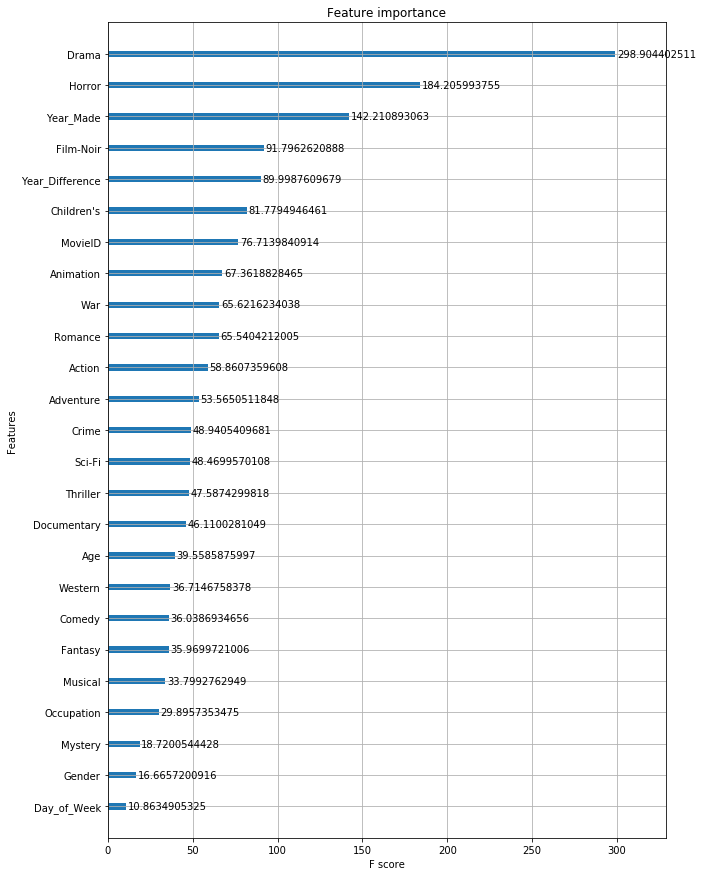

In [386]:
fig, ax = plt.subplots(figsize=(10, 15))
xgb.plot_importance(model, ax=ax, importance_type = 'gain');

In [43]:
z = cosine_similarity(X_train[:5])

In [44]:
z

array([[1.        , 0.49306468, 0.33968733, 0.53418187, 0.37756046],
       [0.49306468, 1.        , 0.44996304, 0.26958762, 0.30643393],
       [0.33968733, 0.44996304, 1.        , 0.47699446, 0.28454018],
       [0.53418187, 0.26958762, 0.47699446, 1.        , 0.50966475],
       [0.37756046, 0.30643393, 0.28454018, 0.50966475, 1.        ]])

In [37]:
cosine_similarity(X_train[19:20], X_train[7:8])

array([[0.94345758]])

In [41]:
X_test[17], y_train[17:18]

(array([1.        , 0.16666667, 0.05      , 0.43478261, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.24691358, 0.75308642, 0.66666667]),
         1  2  3  4  5
 772518  0  0  0  1  0)

In [186]:
sims = []
t = 334
for i in range(0,10000):
    cos_sim = cosine_similarity(X_train[t:t+1], X_train[i:i+1])
    if cos_sim > .9:
        sims.append(i)
print(y_train[t:t+1])

        1  2  3  4  5
934678  0  0  0  1  0


In [187]:
l = []
for i in sims:
    l.append(np.argmax(np.array(y_train[i: i+1]))+1)

In [188]:
np.mean(l)

4.5

In [167]:
t_df.groupby('UserID')['Rating'].mean()

UserID
1       4.188679
2       3.713178
3       3.901961
4       4.190476
5       3.146465
6       3.901408
7       4.322581
8       3.884892
9       3.735849
10      4.114713
11      3.277372
12      3.826087
13      3.388889
14      3.320000
15      3.323383
16      3.028571
17      4.075829
18      3.649180
19      3.572549
20      4.083333
21      2.909091
22      3.067340
23      3.315789
24      3.948529
25      3.741176
26      2.960000
27      4.171429
28      3.757009
29      3.583333
30      3.488372
          ...   
6011    3.969543
6012    3.000000
6013    4.080645
6014    3.886792
6015    3.754386
6016    3.189219
6017    3.515152
6018    3.591195
6019    3.460674
6020    4.395349
6021    3.500000
6022    3.854167
6023    3.687075
6024    4.126316
6025    3.302583
6026    3.617284
6027    4.250000
6028    3.446809
6029    3.903226
6030    3.939130
6031    3.666667
6032    4.134615
6033    3.850000
6034    4.095238
6035    2.610714
6036    3.302928
6037    3.717822
6038   

In [169]:
t_df.query('UserID == 1')

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Hour,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Year_Difference,Year_Made,Day_of_Week
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),16,...,0,0,0,0,0,0,0,25,1975,Sunday
1725,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),16,...,0,0,0,0,0,0,0,4,1996,Sunday
2250,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),16,...,0,0,0,0,0,0,0,36,1964,Sunday
2886,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),16,...,0,0,0,0,0,0,0,0,2000,Sunday
4201,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",17,...,0,0,0,0,0,0,0,3,1998,Saturday
5904,1,F,1,10,48067,1197,3,978302268,"Princess Bride, The (1987)",16,...,0,0,0,0,0,0,0,13,1987,Sunday
8222,1,F,1,10,48067,1287,5,978302039,Ben-Hur (1959),16,...,0,0,0,0,0,0,0,41,1959,Sunday
8926,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",16,...,0,0,0,0,0,0,0,17,1983,Sunday
10278,1,F,1,10,48067,594,4,978302268,Snow White and the Seven Dwarfs (1937),16,...,0,0,0,0,0,0,0,63,1937,Sunday
11041,1,F,1,10,48067,919,4,978301368,"Wizard of Oz, The (1939)",16,...,0,0,0,0,0,0,0,61,1939,Sunday


In [178]:
t_df[118250:118251]

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Hour,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Year_Difference,Year_Made,Day_of_Week
118250,3678,M,3,0,06880,480,4,967052954,Jurassic Park (1993),12,...,0,0,0,0,0,0,0,7,1993,Wednesday


In [179]:
t_df.query('UserID == 3678')['Rating'].mean()

3.2014388489208634